# Character graph

Some changes I made to the original plan: 

I think it will be too complicated, and visually distracting, to attempt multiple words. Let's just do one word at a time.

And given that choice, I think it's also not necessary to allow people to choose *not* to break the word by gender. They'll always be breaking it either by author gender or character gender.

This, in turn, frees us up to add one additional choice, which is basically the choice of whether to look at words used to *describe* characters, or the words that the characters themselves speak in dialogue.

In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fulldata = pd.read_csv('5kwordsbygender.csv')
# Filter, because we're not going to use data about dialogue
# In production, we'll just leave out that data.
fulldata = fulldata[(fulldata['date'] > 1922) & (fulldata['date'] < 2010)]

# Those date endpoints are created because the current dataset gets sparse
# at the ends. In the final production version we will be using a larger
# dataset stretching from 1800 through 2009. So twice to three times
# this size. Let me know if scale is likely to pose a problem.

In [53]:
# This function does the work of extracting word frequencies
# for a given gender, dividing either on the author column
# or the character column. Frequencies need to be
# expressed **relative** to the total number of words
# contained in that gender category. To achieve this 
# we divide the word counts by the total counts
# for the category.

def extract_relative_freqs(divide_column, gender2get, rows4word, totalcounts):
    
    words4gender = rows4word.loc[rows4word[divide_column] == gender2get]
    totals4gender = totalcounts.loc[totalcounts[divide_column] == gender2get]
    
    wordsbydate = words4gender.groupby(['date'])
    summedbydate = wordsbydate.aggregate(np.sum)
    countsofword4gender = summedbydate['count']
    
    totalsbydate = totals4gender.groupby(['date'])
    totsummedbydate = totalsbydate.aggregate(np.sum)
    totals4gender = totsummedbydate['count']
    
    proportions = countsofword4gender / totals4gender
    
    # NaNs are probably places where the word is simply absent
    proportions = proportions.fillna(value = 0)
    
    return proportions

### Actual visualization

This is expressed procedurally, with the user answering questions at the console.
But on the web it would make more sense to have only one text field (for the word).
The questions about data type, and about dividing by author/character, would more
logically be expressed through check boxes or radio buttons.

Choose either 1) dialogue or 2) description: 1
word? crap
divide by (author / character / nothing: char


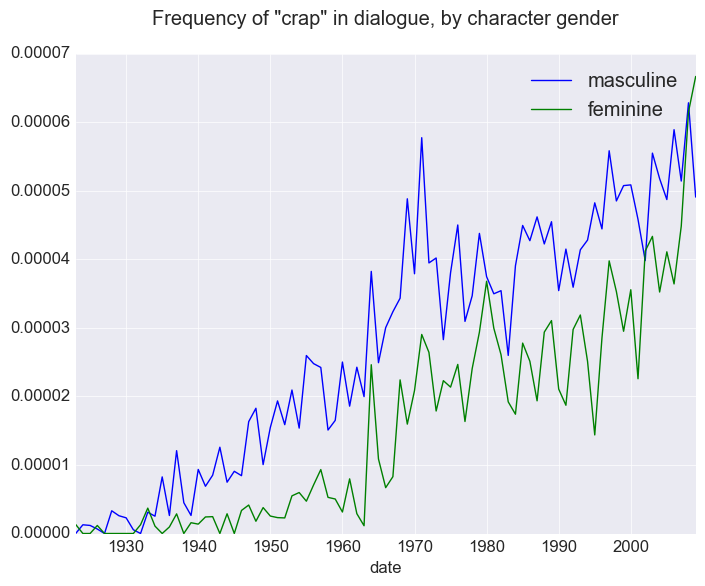

In [78]:
# We start by selecting a data type (either dialogue or description)
# and dividing the data accordingly.

datatype = 'invalid'
validtypes = {'dialogue', 'description'}

while datatype not in validtypes:
    dtype = input('Choose either 1) dialogue or 2) description: ')
    if dtype == '1':
        datatype = 'dialogue'
    elif dtype == '2':
        datatype = 'description'

# Now, to subset the data.
data = fulldata[fulldata['role'] == datatype]

# Create a vocabulary of available words.
vocabulary = set(data['word'].unique())
word = 'nonsense_word'

# Ask the user to select one.
while word not in vocabulary:
    word = input('word? ')
    
divideby = input('divide by (author / character / nothing: ')
    

rows4word = data.loc[data['word'] == word]
totalcounts = data.loc[data['word'] == '#totalforcategory']

if divideby.startswith('a'):
    dividecolname = 'authgender'
    thetitle = 'Frequency of \"' + word + '\" in ' + datatype + ', by author gender\n'
else:
    dividecolname = 'chargender'
    thetitle = 'Frequency of \"' + word + '\" in ' + datatype + ', by character gender\n'

maleseries = extract_relative_freqs(dividecolname, 'm', rows4word, totalcounts)
femaleseries = extract_relative_freqs(dividecolname, 'f', rows4word, totalcounts)

plotframe = pd.concat([maleseries, femaleseries], axis=1)
plotframe.columns = ['masculine', 'feminine']

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
sns.set_style("darkgrid")
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'medium'})

plotframe.plot(title = thetitle, figsize = (8,6))
plt.show()
    
    

